In [1]:
import pandas as pd
df = pd.read_csv('data/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [78]:
# isin: 2개 이상 데이터의 유무 알려주는 키워드
cond = df['Species'].isin(['Bream', 'Smelt']) # 도미, 빙어만 추출
lw_df = df.loc[cond, ['Length2', 'Weight']] # 길이/무게 컬럼만 추출
fish_data = lw_df.values.tolist() # df를 넘파이 array로 바꾼 뒤 >> list로 전환
fish_data

KeyError: 'Species'

In [9]:
# 답지 만들기
fish_target = [1] * 35 + [0] * 14

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
kn = KNeighborsClassifier()

In [18]:
# 훈련 데이터 세트 2개 만들기
train_input = fish_data[:35]
train_target = fish_target[:35]

# 테스트 데이터 세트 2개 만들기
test_input = fish_data[35:]
test_target = fish_target[35:]

In [19]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [20]:
kn.score(test_input, test_target)
# 도미 35마리 학습하라고 줬는데 테스트는 35번째 이후인 빙어 냈으니 정답률 0퍼임

0.0

In [ ]:
# 훈련 세트에 도미/빙어 적절히 섞어 줘야 함 >> 안 그럼 위처럼 샘플링 편향 발생
# 넘파이 설치

In [21]:
import numpy as np

In [35]:
# 리스트를 넘파이 array 2차원 형태로 만듦
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [36]:
np.random.seed(42) # seed 번호 부여하면, 한번 셔플한 값 고정하게 해줌 >> 안 그럼 print 할 때마다 숫자 달라짐
index = np.arange(49) 
np.random.shuffle(index) # 0-48까지의 숫자를 무작위 섞는 것
print(index)
# 무작위 섞은 숫자 활용해서 훈련 데이터 세트 만들 것

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [37]:
# fish_data 구조: [ [길이1, 무게2], [길이2, 무게2] ...]
input_arr[[1,3]] # 내가 원하는 인덱스를 내가 지정한 순서대로 접근하기 >> fancy indexing

array([[ 26.3, 290. ],
       [ 29. , 363. ]])

In [42]:
train_input = input_arr[index[:35]] #35번째까지 넣음
# 한번 섞은 다음 일부만 훈련 데이트 세트로 쓰기 위함
train_target = target_arr[index[:35]] # 한번 섞은 다음, 35번째까지 훈련용 정답지 만든 것

In [43]:
# 트레인 데이터 셋도 똑같이 만들기
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [44]:
import matplotlib.pyplot as plt

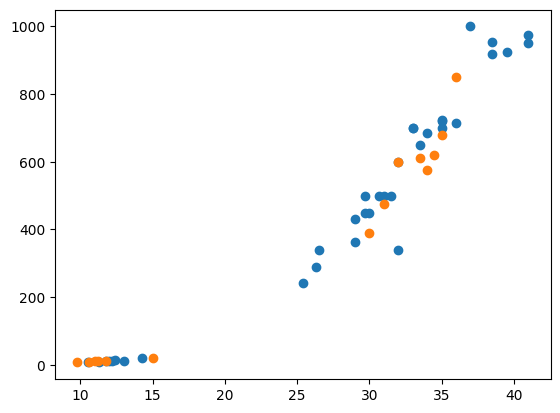

In [46]:
plt.scatter(train_input[:, 0], train_input[:, 1]) # 트레인 인풋: 길이/무게 같이 들어있는 리스트임 >> 전체 데이터 중 0번째가 길이데이터라고 지정한 것
plt.scatter(test_input[:, 0], test_input[:, 1])
# 훈련/테스트 학습 데이터 잘 섞인 것 확인 가능

In [48]:
# 잘 섞였으니 다시 학습시키기
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [50]:
# 학습은 35개 했고, 테스트는 14로 줘서 점수 확인하기
kn.score(test_input, test_target)

1.0

In [51]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

### iris

In [133]:
# seaborn 설치한 뒤 iris 데이터 불러오기
import seaborn as sns
df = sns.load_dataset('iris')
df.head()
# iris(붓꽃) 데이터: 꽃의 특성 대한 길이/너비 등 정보 있음 >> 이를 갖고 세부 종 구분돼 있음

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [57]:
# setosa, virginica 분류하기: petal_length, petal_width	기준으로 분류

In [134]:
# 학습 데이터 생성
cond_df = df[df['species'].isin(['setosa', 'virginica'])]
iris_data = cond_df[['petal_length', 'petal_width']].values.tolist()
cond_df['species'].value_counts()
iris_data

[[1.4, 0.2],
 [1.4, 0.2],
 [1.3, 0.2],
 [1.5, 0.2],
 [1.4, 0.2],
 [1.7, 0.4],
 [1.4, 0.3],
 [1.5, 0.2],
 [1.4, 0.2],
 [1.5, 0.1],
 [1.5, 0.2],
 [1.6, 0.2],
 [1.4, 0.1],
 [1.1, 0.1],
 [1.2, 0.2],
 [1.5, 0.4],
 [1.3, 0.4],
 [1.4, 0.3],
 [1.7, 0.3],
 [1.5, 0.3],
 [1.7, 0.2],
 [1.5, 0.4],
 [1.0, 0.2],
 [1.7, 0.5],
 [1.9, 0.2],
 [1.6, 0.2],
 [1.6, 0.4],
 [1.5, 0.2],
 [1.4, 0.2],
 [1.6, 0.2],
 [1.6, 0.2],
 [1.5, 0.4],
 [1.5, 0.1],
 [1.4, 0.2],
 [1.5, 0.2],
 [1.2, 0.2],
 [1.3, 0.2],
 [1.4, 0.1],
 [1.3, 0.2],
 [1.5, 0.2],
 [1.3, 0.3],
 [1.3, 0.3],
 [1.3, 0.2],
 [1.6, 0.6],
 [1.9, 0.4],
 [1.4, 0.3],
 [1.6, 0.2],
 [1.4, 0.2],
 [1.5, 0.2],
 [1.4, 0.2],
 [6.0, 2.5],
 [5.1, 1.9],
 [5.9, 2.1],
 [5.6, 1.8],
 [5.8, 2.2],
 [6.6, 2.1],
 [4.5, 1.7],
 [6.3, 1.8],
 [5.8, 1.8],
 [6.1, 2.5],
 [5.1, 2.0],
 [5.3, 1.9],
 [5.5, 2.1],
 [5.0, 2.0],
 [5.1, 2.4],
 [5.3, 2.3],
 [5.5, 1.8],
 [6.7, 2.2],
 [6.9, 2.3],
 [5.0, 1.5],
 [5.7, 2.3],
 [4.9, 2.0],
 [6.7, 2.0],
 [4.9, 1.8],
 [5.7, 2.1],
 [6.0, 1.8],
 [4.8, 1.8],

In [136]:
# setosa = 1, virginica = 0 부여해 답지 생성
iris_target = [1] * 50 + [0] * 50
iris_target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

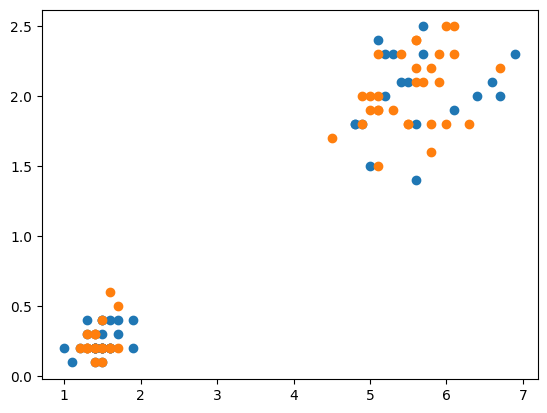

In [144]:
# 무작위 섞기
input_arr = np.array(iris_data)
target_arr = np.array(iris_target)

np.random.seed(42)
index = np.arange(99)
np.random.shuffle(index)

train_input = input_arr[index[:50]]
train_target = target_arr[index[:50]]

test_input = input_arr[index[50:]]
test_target = target_arr[index[50:]]

plt.scatter(train_input[:, 0], train_input[:,1])
plt.scatter(test_input[:, 0], test_input[:, 1])

In [145]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [147]:
kn.score(test_input, test_target)

1.0

In [149]:
kn.predict(test_input)

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0])

### 강사님 코드

In [167]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


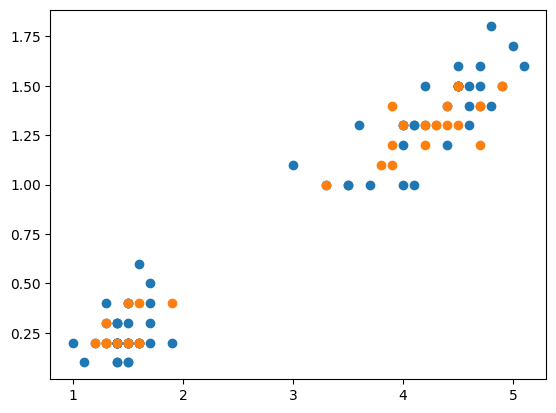

In [171]:
cond = iris['species'].isin(['setosa', 'versicolor'])
iris_df = iris.loc[cond, ['petal_length', 'petal_width']]
iris_data = iris_df.values

# 종류별 갯수 세기
setosa_count = iris.loc[iris['species'] == 'setosa'].shape[0] # 세토사만 뽑기 >> shape으로 행/열 갯수 튜플로 뽑기 >> 그중 행 갯수만 추출 위해 [0]
versicolor_count = iris.loc[iris['species'] == 'versicolor'].shape[0] #버지컬러 행 뽑기

# 정답지 만들기: 1/0 할당하기 >> 그럼 1, 0으로 가득찬 리스트 만들어짐 >> 리스트 1, 리스트 0으로 가득 차게 됨
import numpy as np
iris_target = np.array([1] * setosa_count + [0] * versicolor_count)
    # 이후 팬시 인덱싱 위해 넘파이 형태로 변환

# 무작위로 섞기: 파이썬 range() 활용
import random
index = list(range(setosa_count + versicolor_count)) # 데이터 총합 갯수 세기 >> 이후 총합 갯수만큼의 수 있는 list 만들기
random.shuffle(index) # random 모듈 활용해서 데이터 총합만큼 있는 숫자 리스트 무작위 섞기

# 맨앞~70까지 학습, 70~맨끝 30개는 테스트하기
train_input = iris_data[index[:70]] # 팬시 인덱싱 하는 것 >> 그러려면 넘파이이거나 df 형태여야 함
train_target = iris_target[index[:70]]

test_input = iris_data[index[70:]]
test_target = iris_target[index[70:]]

# 
plt.scatter(train_input[:, 0], train_input[:, 1]) # 이거 왜하는 거임??
plt.scatter(test_input[:, 0], test_input[:, 1])